In [7]:
import xarray as xr
import numpy as np
import pandas as pd

In [8]:
local_path = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'

dew_point_xr = xr.open_dataset(local_path)
dew_point_xr

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2920)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-12-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
# import 1st track

head = ['lon_east', 'lon_west', 'lat_south', 'lat_north']
track_1 = pd.read_csv('tc_irad_tracks/tc_irad_1.txt')
track_1.columns = head

In [74]:
# slice the time dimension

dates = pd.read_csv('storms_start_end.csv', sep=',')

start_first = dates['start_date'][0]
end_first = dates['end_date'][0]

dew_point_xr = dew_point_xr.sel(time=slice(start_first, end_first))
dew_point_xr

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [76]:
# create new pd dataframe

first_slice = track_1.iloc[0]

test_dp     = dew_point_xr.sel(longitude=slice(first_slice['lon_east'], first_slice['lon_west']), latitude=slice(first_slice['lat_north'], first_slice['lat_south']))
test_dp

<xarray.Dataset>
Dimensions:    (longitude: 32, latitude: 32, time: 62)
Coordinates:
  * longitude  (longitude) float32 289.2 289.5 289.8 290.0 ... 296.5 296.8 297.0
  * latitude   (latitude) float32 45.75 45.5 45.25 45.0 ... 38.5 38.25 38.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

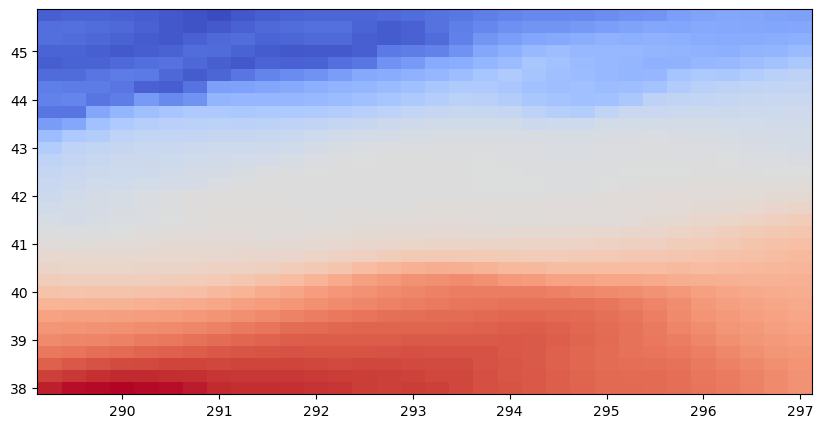

In [77]:
# plot the first slice with matplotlib

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.pcolormesh(test_dp.longitude, test_dp.latitude, test_dp.d2m[0,:,:], cmap='coolwarm')

In [78]:
# check if it's correct

lon_test = np.asanyarray(dew_point_xr.longitude[:])
lat_test = np.asanyarray(dew_point_xr.latitude[:])


closest_lon_w =np.abs(lon_test - first_slice['lon_west']).argmin()
closest_lon_e = np.abs(lon_test - first_slice['lon_east']).argmin()
closest_lat_s = np.abs(lat_test - first_slice['lat_south']).argmin()
closest_lat_n = np.abs(lat_test - first_slice['lat_north']).argmin()

lon_test[closest_lon_w]
lat_test[closest_lat_s]

# works

38.0

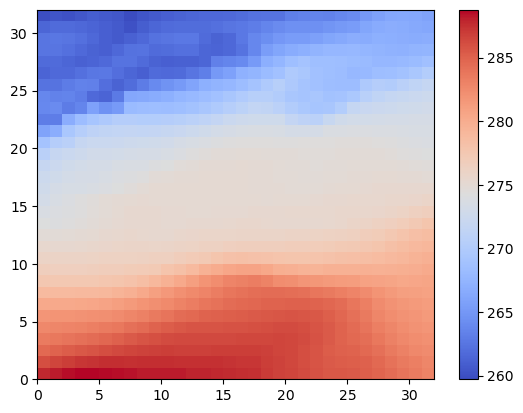

In [79]:
#slice with new boundaries

plt.pcolormesh(np.flipud(dew_point_xr['d2m'][0,176:208,1157:1189]), cmap='coolwarm')
plt.colorbar()

In [80]:
lat_test[208]

38.0

In [81]:
# iterate through each time step

var_out = []

for i in range(0, len(track_1)):
    lon_e_temp, lon_w_temp, lat_s_temp, lat_n_temp = track_1.iloc[i]

    lon_test = np.asanyarray(dew_point_xr.longitude[:])
    lat_test = np.asanyarray(dew_point_xr.latitude[:])

    closest_lon_w =np.abs(lon_test - lon_w_temp).argmin()
    closest_lon_e = np.abs(lon_test - lon_e_temp).argmin()
    closest_lat_s = np.abs(lat_test - lat_s_temp).argmin()
    closest_lat_n = np.abs(lat_test - lat_n_temp).argmin()

    temp_ds = np.asarray(dew_point_xr['d2m'])

    var_out.append(temp_ds[i,closest_lat_n:closest_lat_s,closest_lon_e:closest_lon_w])

var_out

[array([[259.8495 , 260.31342, 260.15176, ..., 266.30927, 266.26184,
         265.9051 ],
        [261.52243, 261.779  , 261.7948 , ..., 266.67126, 266.4973 ,
         266.28116],
        [262.54868, 262.6067 , 262.4415 , ..., 266.8558 , 266.68182,
         266.78726],
        ...,
        [284.66586, 284.9189 , 285.25806, ..., 283.1757 , 282.74338,
         282.42532],
        [286.11035, 286.5409 , 286.88177, ..., 283.64136, 283.2073 ,
         282.81192],
        [287.75342, 288.1523 , 288.48795, ..., 283.97174, 283.48846,
         282.99115]], dtype=float32),
 array([[254.40016, 254.43355, 254.5882 , ..., 266.5588 , 267.43744,
         268.1808 ],
        [255.1804 , 255.36316, 255.99754, ..., 267.95935, 268.7273 ,
         269.38803],
        [256.3033 , 256.6741 , 257.54572, ..., 269.0489 , 269.74475,
         270.52676],
        ...,
        [284.19843, 284.68344, 285.26862, ..., 282.52197, 282.1916 ,
         282.1178 ],
        [285.76944, 286.3546 , 286.91693, ..., 282.55536,

In [82]:
print(closest_lon_w, closest_lon_e, closest_lat_s, closest_lat_n)

1430 1398 116 84


In [83]:
# check if each square has the same shape

for i in range(0, len(var_out)):
    print(var_out[i].shape)

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


In [84]:
# mean, min, max value of each time step

mean_out_d2m = []
min_out_d2m = []
max_out_d2m = []

for i in range(0, len(var_out)):
    mean_out_d2m.append(np.mean(var_out[i]))
    min_out_d2m.append(np.min(var_out[i]))
    max_out_d2m.append(np.max(var_out[i]))

In [86]:
# save as csv

df_mean = pd.DataFrame(mean_out_d2m)
df_min = pd.DataFrame(min_out_d2m)
df_max = pd.DataFrame(max_out_d2m)

df_mean.to_csv('d2m_mean.csv')
df_min.to_csv('d2m_min.csv')
df_max.to_csv('d2m_max.csv')

For all variables, (class by variable (folder), then by storm)) 